In [1]:
from pyEclipseDVH_v2 import Load_patient
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
files = os.listdir()   # return a list of files
txt_files = [file for file in files if file.endswith('.txt')]

In [3]:
for i, file in enumerate(txt_files):
    if i == 0:
        multi_df = Load_patient(file)        
    else:
        multi_df = pd.concat([multi_df, Load_patient(file)], axis=1)

Case1_AAA.txt loaded 	 patID:Case1 PlanID:AAA and number of structures is 25
Case1_AXB.txt loaded 	 patID:Case1 PlanID:AXB and number of structures is 25
Case5_AAA.txt loaded 	 patID:Case5 PlanID:AAA and number of structures is 29
Case5_AXB.txt loaded 	 patID:Case5 PlanID:AXB and number of structures is 29


In [4]:
multi_df.head()

Patient ID       Case1                                                         \
Plan ID            AAA                                                          
Structure         BODY    GTV       Heart     Foramen Foramen+5mm  Oesophagus   
Dose (Gy)                                                                       
0.00        100.000000  100.0  100.000000  100.000000  100.000000  100.000000   
0.05         94.650546  100.0  100.000000  100.000000  100.000000  100.000000   
0.10         84.657252  100.0   99.228210   99.109820   97.594712  100.000000   
0.15         75.699474  100.0   95.117282   89.524147   88.564127   99.694547   
0.20         68.629984  100.0   90.089920   81.775955   81.023144   94.893054   

Patient ID                                                           ...     \
Plan ID                                                              ...      
Structure  Foramen+3mm     Trachea Bronchial tree L Brachial plex    ...      
Dose (Gy)                                                            ...      
0.00        100.000000  100.000000          100.0      100.000000    ...      
0.05        100.000000  100.000000          100.0      100.000000    ...      
0.10         98.241807  100.000000          100.0      100.000000    ...      
0.15         88.683684   92.911855          100.0       99.806907    ...      
0.20         80.788367   77.559046          100.0       70.215692    ...      

Patient ID           Case5                                                   \
Plan ID                AAA                                                    
Structure  R Brachial plex Pseudo ITV    Ribs-PTV PseudPTV_edit Pseudo ring   
Dose (Gy)                                                                     
0.00                 100.0      100.0  100.000000         100.0  100.000000   
0.05                 100.0      100.0   99.999910         100.0   99.992912   
0.10                 100.0      100.0   99.084434         100.0   99.983445   
0.15                 100.0      100.0   90.151472         100.0   99.970446   
0.20                 100.0      100.0   78.048038         100.0   99.954081   

Patient ID                                                        
Plan ID                                                           
Structure  PseudoPTV_edit   cool Dose 100[%] Dose 27Gy Dose 30Gy  
Dose (Gy)                                                         
0.00                100.0  100.0       100.0     100.0     100.0  
0.05                100.0  100.0       100.0     100.0     100.0  
0.10                100.0  100.0       100.0     100.0     100.0  
0.15                100.0  100.0       100.0     100.0     100.0  
0.20                100.0  100.0       100.0     100.0     100.0  

[5 rows x 108 columns]

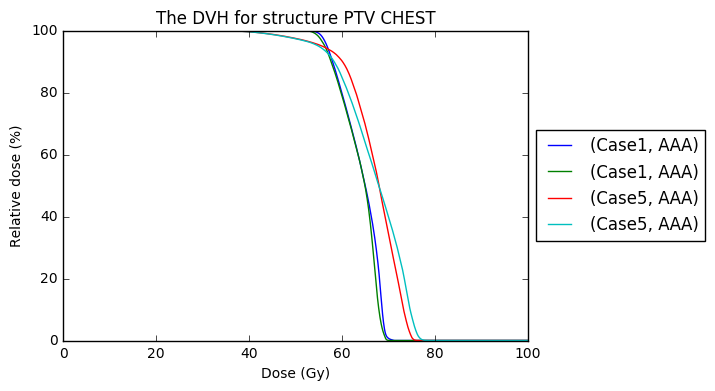

In [5]:
structure = 'PTV CHEST'
multi_df.xs(structure, level='Structure', axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('The DVH for structure ' + structure)
plt.ylabel('Relative dose (%)')

In [6]:
multi_df.to_csv('All_data.csv')   # save all data to flat CSV